# Run inference on one frame
Then evaluate

In [159]:
from mmdet3d.apis import LidarDet3DInferencer
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [160]:
# Initialize inferencer
inferencer = LidarDet3DInferencer('pointpillars_kitti-3class')

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmdetection3d/v1.0.0_models/pointpillars/hv_pointpillars_secfpn_6x8_160e_kitti-3d-3class/hv_pointpillars_secfpn_6x8_160e_kitti-3d-3class_20220301_150306-37dc2420.pth


In [161]:
# inference
frame = '006000'
bin_path = '../../mmdetection3d/data/arcs/training/velodyne/' + frame + '.bin'
label_path = '../../mmdetection3d/data/arcs/training/label_2/' + frame + '.txt'
inputs = dict(points=bin_path)
points = np.fromfile(bin_path, dtype=np.float32).reshape(-1, 4)
predictions = inferencer(inputs)

Output()

In [162]:
print(predictions)

{'predictions': [{'labels_3d': [1, 2, 2, 2, 2, 2], 'scores_3d': [0.37436285614967346, 0.8860181570053101, 0.846523106098175, 0.5451850891113281, 0.4473717212677002, 0.4247516095638275], 'bboxes_3d': [[5.028863430023193, -15.78142261505127, -0.721443772315979, 1.7926948070526123, 0.6943190097808838, 1.7274187803268433, 1.5951296091079712], [2.158820867538452, 25.521644592285156, -2.0219573974609375, 4.410659313201904, 1.713751196861267, 1.4779202938079834, -1.0621992349624634], [10.126334190368652, 26.06059455871582, -1.8438267707824707, 4.386297225952148, 1.6843407154083252, 1.5065099000930786, 2.106016159057617], [29.500598907470703, -14.849691390991211, 0.2762340307235718, 4.206188201904297, 1.5862056016921997, 1.5070021152496338, 2.1125431060791016], [28.044879913330078, -20.803447723388672, 0.47694647312164307, 4.386697292327881, 1.6085255146026611, 1.3169963359832764, 1.2406989336013794], [31.531211853027344, -25.256420135498047, 0.4247567653656006, 4.498119831085205, 1.6615589857

In [163]:
def set_axes_limited(ax, limit=50):
    # Set axes to a fixed range around the origin to limit view to +/- 'limit' meters.
    ax.set_xlim3d([-limit, limit])
    ax.set_ylim3d([-limit, limit])
    ax.set_zlim3d([-limit, limit])

In [164]:
def set_axes_equal(ax):
    """Make axes of 3D plot have equal scale so that spheres appear as spheres, cubes as cubes, etc."""
    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    box_size = max([x_range, y_range, z_range]) / 2.0

    ax.set_xlim3d([x_middle - box_size, x_middle + box_size])
    ax.set_ylim3d([y_middle - box_size, y_middle + box_size])
    ax.set_zlim3d([z_middle - box_size, z_middle + box_size])

In [165]:
# Function to plot the bounding box
def plot_bbox(ax, bbox, color):
    # Assuming bbox is in the format [x, y, z, dx, dy, dz, yaw] and centered at (x, y, z)
    
#     dz, dy, dx, x, z, y, yaw = bbox
    x, y, z, dx, dy, dz, yaw = bbox
#     dz, dy, dx, x, y, z, yaw = bbox

    
    corners = np.array([
        [x - dx/2, y - dy/2, z - dz/2],
        [x + dx/2, y - dy/2, z - dz/2],
        [x + dx/2, y + dy/2, z - dz/2],
        [x - dx/2, y + dy/2, z - dz/2],
        [x - dx/2, y - dy/2, z + dz/2],
        [x + dx/2, y - dy/2, z + dz/2],
        [x + dx/2, y + dy/2, z + dz/2],
        [x - dx/2, y + dy/2, z + dz/2]
    ])
    

    # Rotate corners around the Z-axis (around their centers)
    rotation_matrix = np.array([
        [np.cos(yaw), -np.sin(yaw), 0],
        [np.sin(yaw),  np.cos(yaw), 0],
        [0,            0,           1]
    ])

    # # Adjust the corners to be about the origin for rotation, then add the [x, y, z] back after rotation
    corners = corners - np.array([x, y, z])
    corners = np.dot(corners, rotation_matrix.T)
    corners += np.array([x, y, z])
    
    # Define the edges of the bounding box
    edges = [
        (0, 1), (1, 2), (2, 3), (3, 0),
        (4, 5), (5, 6), (6, 7), (7, 4),
        (0, 4), (1, 5), (2, 6), (3, 7)
    ]
    # Plot the edges
    for edge in edges:
        ax.plot3D(*zip(corners[edge[0]], corners[edge[1]]), color=color, linewidth=1)

In [166]:
# Function to plot the bounding box
def plot_bbox_arcs(ax, bbox, color):
    # Assuming bbox is in the format [x, y, z, dx, dy, dz, yaw] and centered at (x, y, z)
    
    dz, dy, dx, x, z, y, yaw = bbox

    yaw = -yaw
    
    corners = np.array([
        [x - dx/2, y - dy/2, z - dz/2],
        [x + dx/2, y - dy/2, z - dz/2],
        [x + dx/2, y + dy/2, z - dz/2],
        [x - dx/2, y + dy/2, z - dz/2],
        [x - dx/2, y - dy/2, z + dz/2],
        [x + dx/2, y - dy/2, z + dz/2],
        [x + dx/2, y + dy/2, z + dz/2],
        [x - dx/2, y + dy/2, z + dz/2]
    ])
    

    # Rotate corners around the Z-axis (around their centers)
    rotation_matrix = np.array([
        [np.cos(yaw), -np.sin(yaw), 0],
        [np.sin(yaw),  np.cos(yaw), 0],
        [0,            0,           1]
    ])

    # # Adjust the corners to be about the origin for rotation, then add the [x, y, z] back after rotation
    corners = corners - np.array([x, y, z])
    corners = np.dot(corners, rotation_matrix.T)
    corners += np.array([x, y, z])
    
    # Rotate the entire bounding box 90 degrees (pi/2 radians) around the origin
    rotation_matrix = np.array([
        [np.cos(-np.pi / 2), -np.sin(-np.pi / 2), 0],
        [np.sin(-np.pi / 2),  np.cos(-np.pi / 2), 0],
        [0,                    0,                 1]
    ])
    
    # Apply the rotation to the corners
    corners = np.dot(corners, rotation_matrix.T)
    
    # Define the edges of the bounding box
    edges = [
        (0, 1), (1, 2), (2, 3), (3, 0),
        (4, 5), (5, 6), (6, 7), (7, 4),
        (0, 4), (1, 5), (2, 6), (3, 7)
    ]
    # Plot the edges
    for edge in edges:
        ax.plot3D(*zip(corners[edge[0]], corners[edge[1]]), color=color, linewidth=0.5)

In [167]:
def read_kitti_labels(label_path):
    bboxes = []
    with open(label_path, 'r') as file:
        for line in file:
            parts = line.strip().split()
            if parts[0] != 'DontCare':
                bbox = [float(value) for value in parts[8:15]]  # Extract the bounding box dimensions and location
                bboxes.append(bbox)
    return np.array(bboxes)

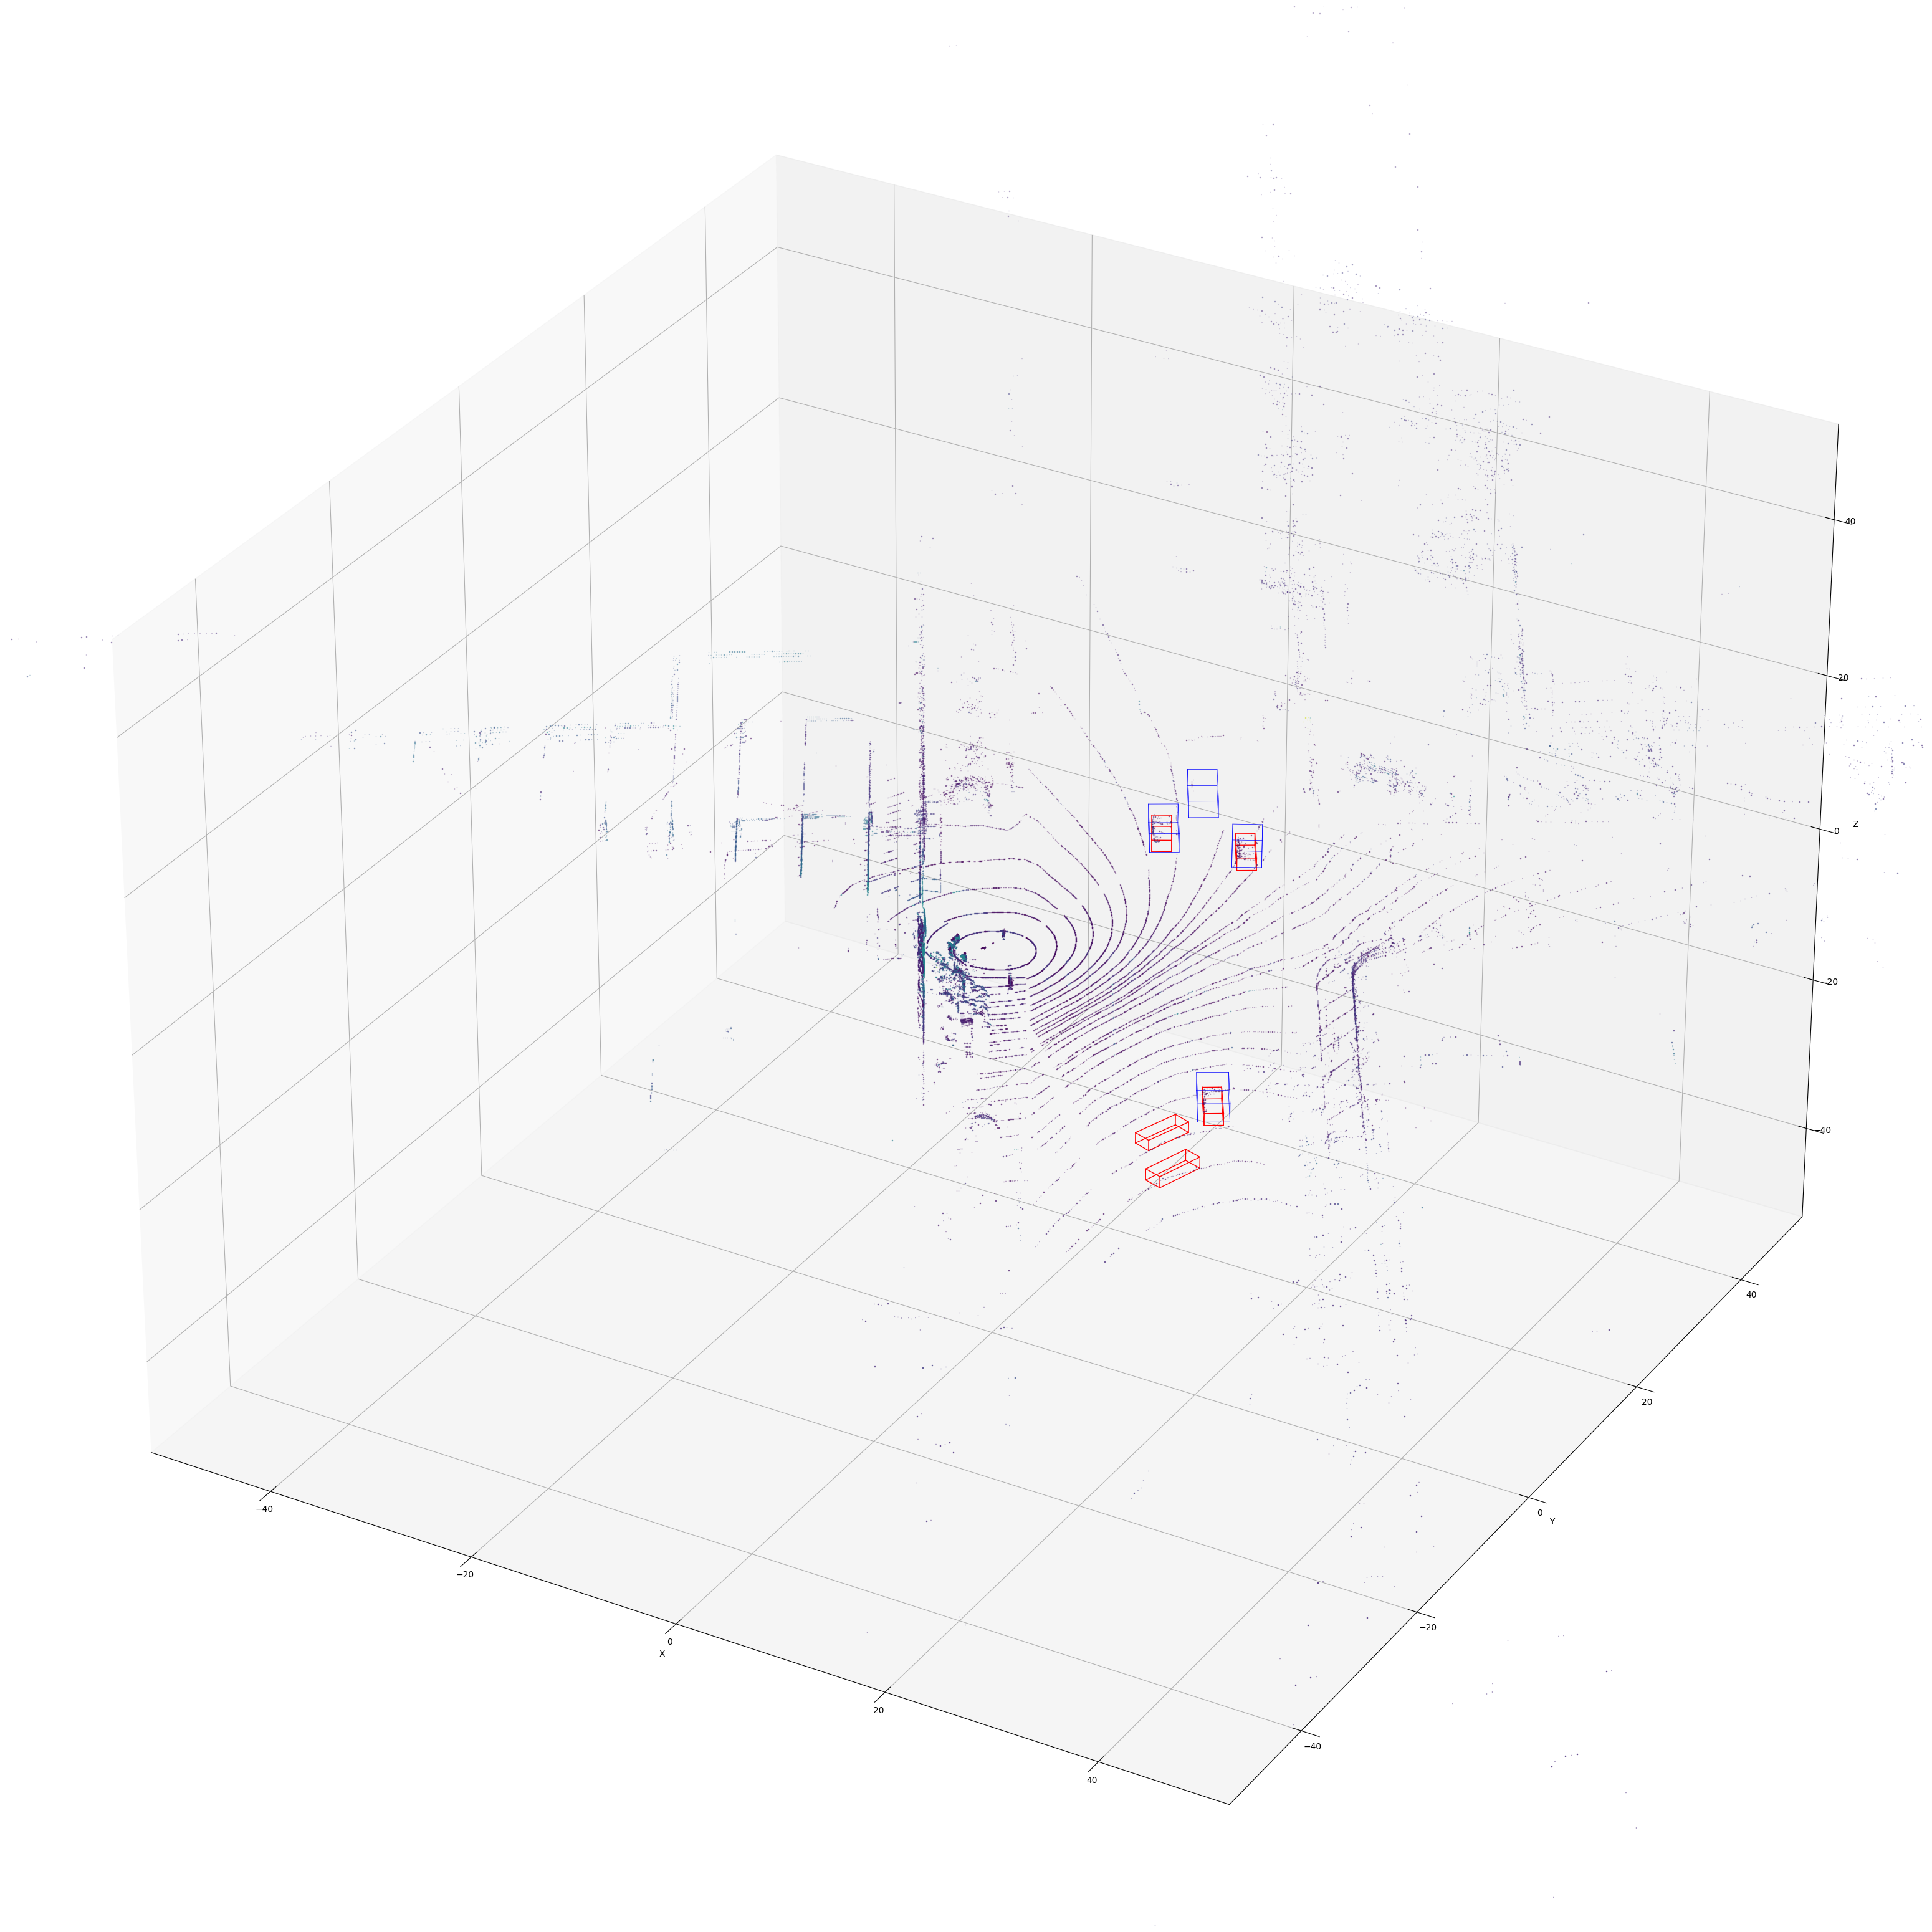

In [168]:
# Set up the plot
fig = plt.figure(figsize=(40, 40))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=0.1, c=points[:, 3], cmap='viridis', marker=',')

score_threshold = 0.0

# Plot each bounding box with score above threshold
for pred in predictions['predictions']:
    for label, score, bbox in zip(pred['labels_3d'], pred['scores_3d'], pred['bboxes_3d']):
        if score > score_threshold and label == 2:
            plot_bbox(ax, bbox, 'r')
            
# Plot ground truth
for bbox in read_kitti_labels(label_path):
    plot_bbox_arcs(ax, bbox, 'b')
            
# Setting axes properties
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
set_axes_equal(ax)

# Setting axes properties with a limited range
set_axes_limited(ax)

# Show the plot
plt.show()

# Save the figure
fig.savefig('3d_scatter_with_bboxes.png', dpi=300)

In [169]:
# Evaluate prediction
# I have a .txt file with the label and coordinates
# I have this prediction dictionary
# For each prediction over a certain threshold
# Check against all of the labels
# If there is an overlap of a label
# Calculate the UoI
# Otherwise, it's zero?

In [170]:
# def calculate_iou(box_pred, box_gt):
#     # Implement IoU calculation for 3D boxes here
#     print('calculating IoU')

In [171]:
# def evaluate_model(predictions, ground_truths, threshold=0.5):
#     TPs, FPs, FNs = 0, 0, len(ground_truths)
#     used_gt = set()
    
#     for pred in predictions:
#         if pred['score'] < threshold:
#             continue
        
#         best_iou = 0
#         best_gt = None
#         for gt in ground_truths:
#             iou = calculate_iou(pred['bbox'], gt)
#             if iou > best_iou:
#                 best_iou = iou
#                 best_gt = gt
        
#         if best_iou > 0.5:  # Example IoU threshold for a match
#             if best_gt not in used_gt:
#                 used_gt.add(best_gt)
#                 TPs += 1
#                 FNs -= 1
#             else:
#                 FPs += 1
#         else:
#             FPs += 1

#     precision = TPs / (TPs + FPs) if TPs + FPs > 0 else 0
#     recall = TPs / (TPs + FNs) if TPs + FNs > 0 else 0
#     return precision, recall

In [172]:
# predictions = 

In [173]:


# # Example usage
# predictions = parse_predictions('predictions.txt')
# ground_truths = parse_ground_truths('ground_truths.txt')
# precision, recall = evaluate_model(predictions, ground_truths)